# Задание «Основы описательной статистики, виды распределений в Python»

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

In [2]:
x,y = stats.norm.rvs(size=5000), stats.norm.rvs(size=5000)

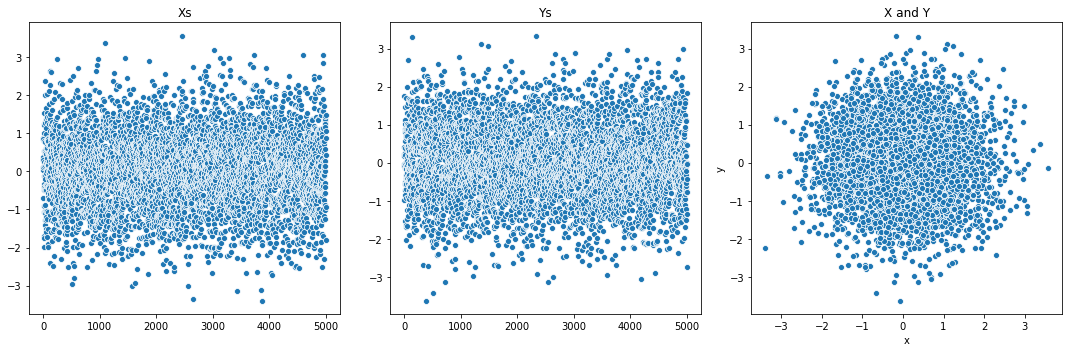

In [3]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.scatterplot(range(len(x)),x)
plt.title('Xs')

plt.subplot(132)
sns.scatterplot(range(len(y)),y)
plt.title('Ys')

plt.subplot(133)
sns.scatterplot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('X and Y')

plt.tight_layout()
plt.show()

## Нарисовать плотность распределения полученной выборки x.

/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


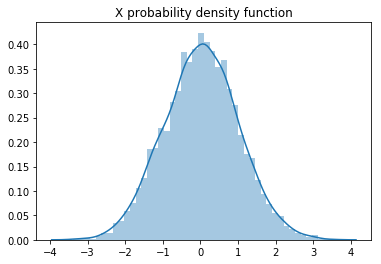

In [4]:
sns.distplot(x)
plt.title('X probability density function')
plt.show()

## Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.

In [5]:
n = 10
scale_mx = np.eye(2)*n
scale_mx

array([[10.,  0.],
       [ 0., 10.]])

In [6]:
norm_dist = np.array([x,y]).T

In [7]:
norm_dist_scaled = norm_dist.dot(scale_mx)
x_scaled = norm_dist_scaled[:,0]
y_scaled = norm_dist_scaled[:,1]

## Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.

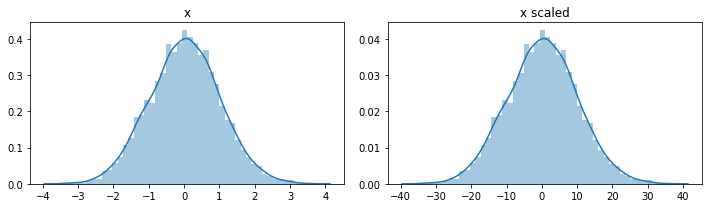

In [8]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.distplot(x)
plt.title('x')

plt.subplot(122)
sns.distplot(x_scaled)
plt.title('x scaled')

plt.tight_layout()
plt.show()

Переменная x находится в интервале [-4,4], а x_scaled - в интервале [-40,40], который в n=10 раз больше предыдущего

## Построить график зависимости (корелляции) x от y.

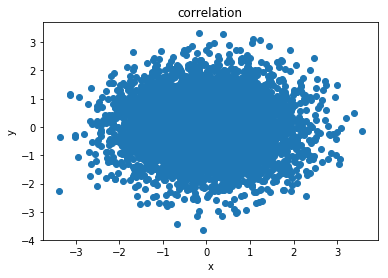

In [9]:
plt.scatter(x,y)
plt.title(f"correlation")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

In [10]:
print('corr coeff: {:.4f}, p-value: {:.4f}'.format(*stats.pearsonr(x,y)))

corr coeff: -0.0004, p-value: 0.9787


Значение коэффициента корреляции = -0.0004, т.е. очень близко к нулю.

Если корреляция между двумя переменными положительна, то, при возрастании одной из величин, вторая тоже возрастает.
Если корреляция между двумя переменными отрицательна, то, при возрастании одной из величин, вторая убывает.
В обоих случаях есть вероятность, что между величинами существует причинно следстенная связь.

Если корреляция равна 0, то значение одной переменной никак не зависит от значения второй.

## Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

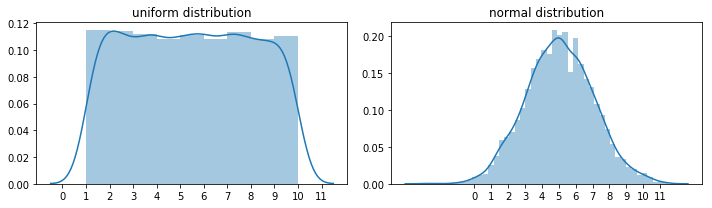

In [11]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.distplot(stats.uniform(loc=1, scale=10-1).rvs(size=5000), bins=9)
plt.xticks(range(12),range(12))
plt.title('uniform distribution')

plt.subplot(122)
sns.distplot(stats.norm(loc=5, scale=2).rvs(size=5000))
plt.title('normal distribution')
plt.xticks(range(12),range(12))

plt.tight_layout()
plt.show()

Значения переменной из нормального распределения сконцентрированны вокруг среднего значения. В равномерном распределении величина может принять любое значение из заданного интервала с одинаковой вероятностью.

## Найти на графике примеры выброса. Что они означают?
https://github.com/yustiks/statistics_in_python/blob/master/dz.ipynb

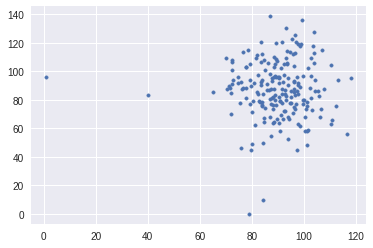

Большая часть точек сконцентрирована вокруг значений x=90, y=90. Возможно эта величина взята из двухмерного нормального распределения.
Выбросы располагаются в близко к точкам (0,100), (40,80), (80,0), (85,10)

## Найти корелляцию в следующих данных

In [12]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url,index_col=0)
df[:3]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price.
Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

df['Date_int'] = df['Date'].rank()#.drop_duplicates().sort_values()
date_int_map = {v:idx for idx,v in enumerate(df['Date_int'].drop_duplicates().values)}
df['Date_int'] = df['Date_int'].apply(lambda x: date_int_map[x])

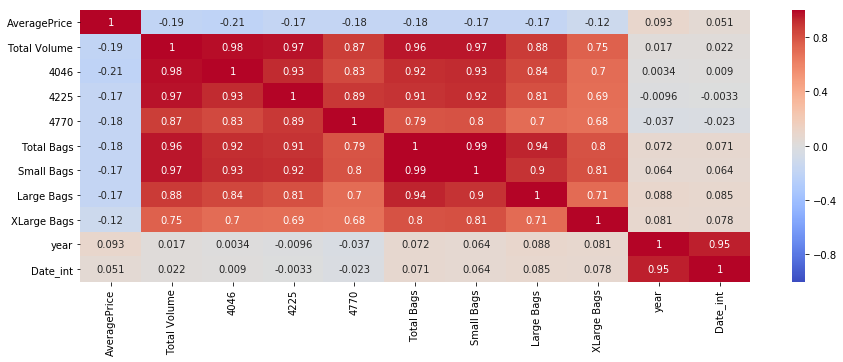

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [15]:
print(((df['Small Bags']+df['Large Bags']+df['XLarge Bags'])/df['Total Bags']).mean())
print(((df['4046']+df['4225']+df['4770']+df['Total Bags'])/df['Total Volume']).mean())

0.9999999964578077
0.9999727023557256


$$Total Volume = 4046 + 4225 + 4770 + Total Bags$$

$$Total Bags = Small Bags + Large Bags + XLarge Bags$$

Большая корреляция между Total Volume и всеми переменными кроме Average Price и Year объясняется приведёнными выше формулами. 

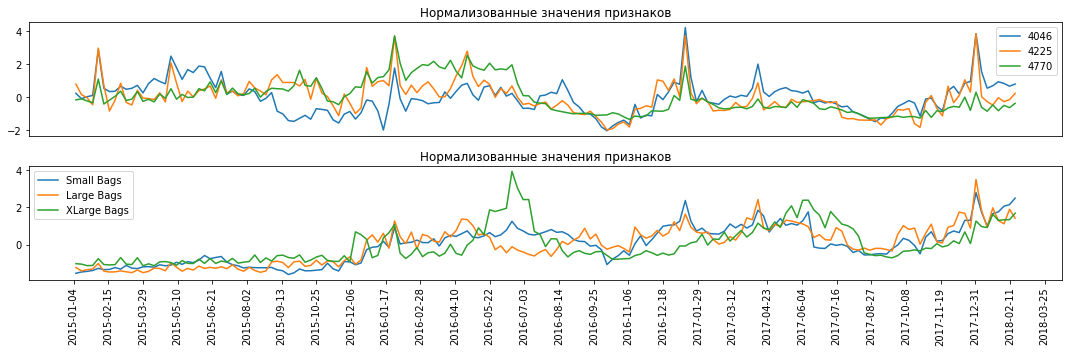

In [16]:
labels = df['Date'].drop_duplicates().sort_values().values
labels = [str(x)[:10] for x in labels]

plt.figure(figsize=(15,5))
plt.subplot(211)
for f in ['4046','4225','4770']:
    cdf = df.groupby(['Date'])[f].sum()
    plt.plot((cdf-cdf.mean())/cdf.std(), label=f)
plt.legend()
coords = plt.xticks()[0]
#plt.xticks(np.linspace(coords.min(), coords.max(), len(labels))[::6], labels[::6], rotation=90)
plt.xticks([])
plt.title('Нормализованные значения признаков')

plt.subplot(212)
for f in ['Small Bags', 'Large Bags', 'XLarge Bags']:
    cdf = df.groupby(['Date'])[f].sum()
    plt.plot((cdf-cdf.mean())/cdf.std(), label=f)
plt.legend()
coords = plt.xticks()[0]
plt.xticks(np.linspace(coords.min(), coords.max(), len(labels))[::6], labels[::6], rotation=90)
plt.title('Нормализованные значения признаков')

plt.tight_layout()
plt.show()

Корреляция между '4046','4225','4770','Small Bags', 'Large Bags', 'XLarge Bags' объясняется зависимостью этих факторов от времени. Они увеличиваются и уменьшаются почти в одни и те же даты.

Все корреляции между Average Price и признаками '4046','4225','4770','Small Bags', 'Large Bags', 'XLarge Bags' отрицательны. Т.е. чем больше цена, тем меньше продаётся авокадо.